In [92]:
# 1. Load CSV file
import pandas as pd
df = pd.read_csv(r"C:\Users\Mayur\OneDrive\Documents\Mangesh Projects\Data Science Project\student_data.csv")
print(df)

   StudentID        Name  Marks  Attendance  Logins
0          1   Student_1   72.5        88.2      19
1          2   Student_2   42.9        31.1      14
2          3   Student_3   74.7        78.2      29
3          4   Student_4   37.8        22.1      20
4          5   Student_5   61.5        95.3      32
5          6   Student_6   61.5        94.3      20
6          7   Student_7   88.7        76.6      17
7          8   Student_8   50.0        61.9      21
8          9   Student_9   58.0        88.3      10
9         10  Student_10   73.1        94.8      27


In [93]:
# 2. calculate Average, correlation and absent impact
Average = df[["Marks","Attendance","Logins"]].mean()
print("Average :\n", Average,"\n")

correlation = df[["Marks","Attendance","Logins"]].corr()
print("Correlation Matrix :\n", correlation)

Average :
 Marks         62.07
Attendance    73.08
Logins        20.90
dtype: float64 

Correlation Matrix :
                Marks  Attendance    Logins
Marks       1.000000    0.702146  0.248010
Attendance  0.702146    1.000000  0.324523
Logins      0.248010    0.324523  1.000000


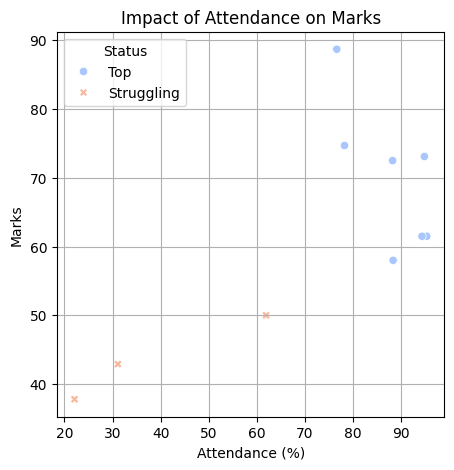

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x='Attendance', y='Marks', hue='Status', style='Status', palette='coolwarm')
plt.title("Impact of Attendance on Marks")
plt.xlabel("Attendance (%)")
plt.ylabel("Marks")
plt.grid(True)
plt.show()



Status
Top           7
Struggling    3
Name: count, dtype: int64


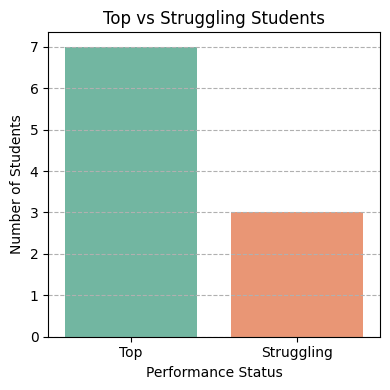

In [134]:
# 3. Visualize top vs struggling students
df['Status'] = df.apply(lambda row: 'Struggling' if row['Marks'] < 35 or row['Attendance'] < 75 else 'Top', axis=1)

status_counts = df['Status'].value_counts()
print(status_counts)

plt.figure(figsize=(4,4))
sns.countplot(data = df, x = 'Status', palette = 'Set2', hue = 'Status')
plt.title("Top vs Struggling Students")
plt.xlabel("Performance Status")
plt.ylabel("Number of Students")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


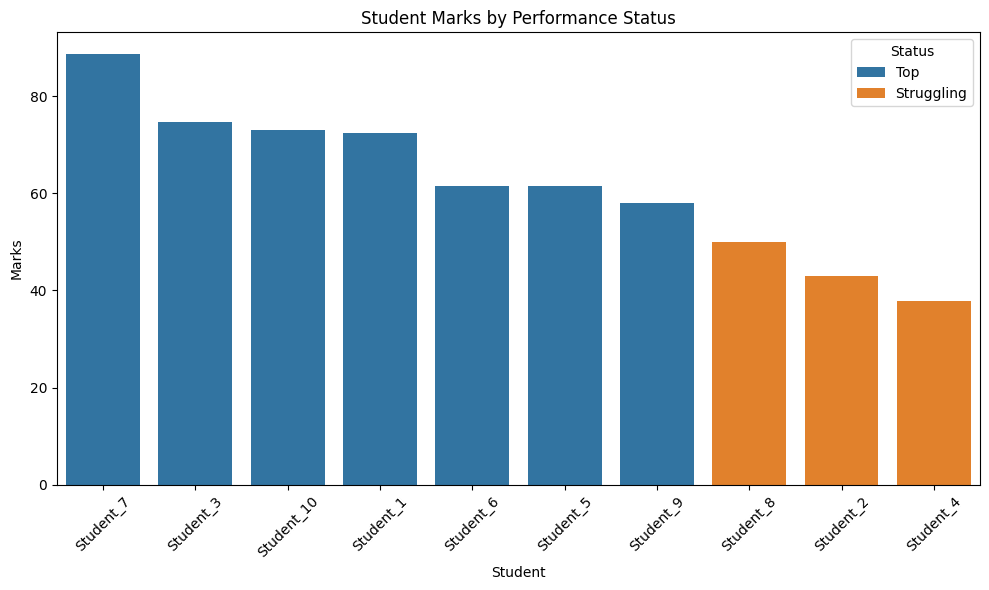

In [135]:
# 4. Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(data = df.sort_values('Marks', ascending = False), x = 'Name', y = 'Marks', hue = 'Status', dodge = False)
plt.xticks(rotation=45)
plt.title("Student Marks by Performance Status")
plt.xlabel("Student")
plt.ylabel("Marks")
plt.tight_layout()
plt.show()

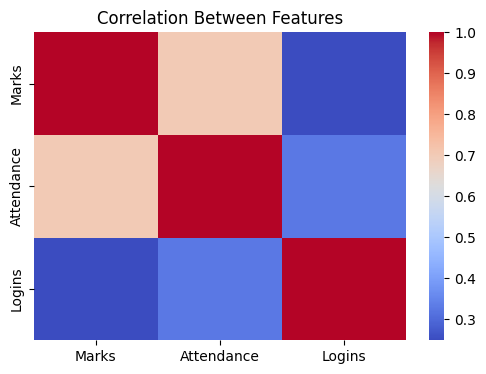

In [155]:
# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()


In [156]:
# Save to CSV
risk_students = df[df['Status'] == 'Struggling']

risk_students.to_csv('at_risk_students.csv', index=False)
print("Saved at-risk students to 'at_risk_students.csv'")


Saved at-risk students to 'at_risk_students.csv'
